**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#reading csv file
loan_dataset = pd.read_csv('/Loan_Prediction.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Reading number of rows and colums in Dataset
loan_dataset.shape

(614, 13)

**Removing null values**

In [ ]:
#Number of null values in Dataset
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Dropping the rows containing null values
loan_dataset = loan_dataset.dropna()

In [ ]:
#Checking for null values again
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_dataset.shape

(480, 13)

**Feature Encoding**

In [ ]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
# #Encoding Categorical Features
# #Assigning each Categorical Features a specific numerical value
# loan_dataset.replace({"Loan_Status":{'N':0,'Y':1},'Married':{'No':0,'Yes':1},
#                       'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
#                       'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
#                       'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
# #Replacing 3+ value of dependent to numerical value=4
# loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

**After Pre-Processing the Dataset**

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


**Some Data Visualizations**

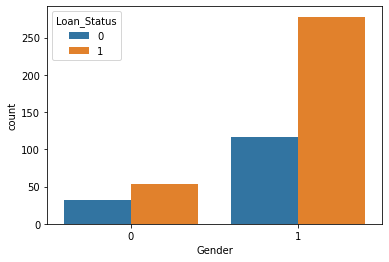

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)
#0=Female 1=Male

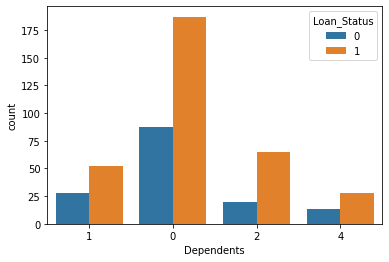

In [ ]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

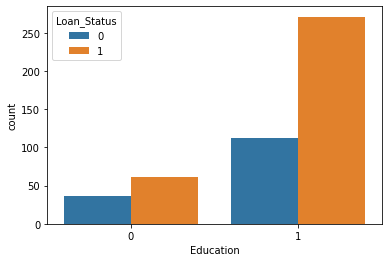

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)
#1=Graduate 0=Non-Graduate

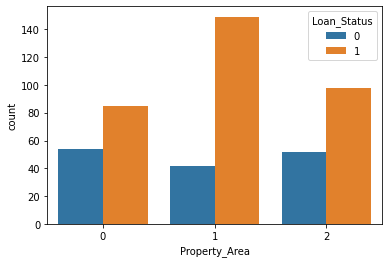

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_dataset)
# 'Rural'= 0,'Semiurban'= 1,'Urban'= 2

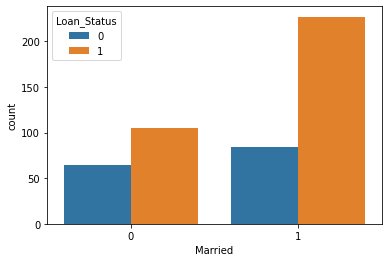

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)
# Married=1 Unmarried=0

**Splitting the Dataset in Data and Labels**

In [ ]:
#Separating the data and label
#Data doesn't contain "Loan_ID" and "Loan_Status"
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)

#Label contains the "Loan_Status"
Y = loan_dataset['Loan_Status']

In [ ]:
#No of rows and columns(Feature) in Data
X.shape

(480, 11)

In [ ]:
#No of rows in Label
Y.shape

(480,)

In [ ]:
#Data and Label shown below
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Splitting into Train and Test subsets**

In [ ]:
#Spliting the Data and Label into train and test subsets to train our Machine Learning Model
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
#No of Row in Train and Test Subsets
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


**MODEL TRAINING**

In [ ]:
#Support Vector Machine Model
from sklearn import svm
from sklearn.metrics import accuracy_score
model1 = svm.SVC(kernel='linear')

In [ ]:
#Training the Model
model1.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on training data
X_train_prediction = model1.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy of SVM on Training Data:",training_data_accuray)

Accuracy of SVM on Training Data: 0.7986111111111112


In [ ]:
# accuracy score on test data
X_test_prediction = model1.predict(X_test)
test_data_accuray = accuracy_score(Y_test,X_test_prediction)

In [ ]:
X_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0])

In [ ]:
Y_test

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64

In [ ]:
print("Accuracy of SVM on Training Data:",test_data_accuray)

Accuracy of SVM on Training Data: 0.8333333333333334


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

DecisionTree

In [ ]:
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
pred=model2.predict(X_test)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [ ]:
Y_test

368    1
74     1
135    0
53     0
96     1
388    1
345    1
8      1
549    1
99     1
49     1
513    0
43     1
92     1
555    1
609    1
221    1
454    1
607    1
179    0
277    1
488    1
150    0
585    0
168    0
267    1
543    1
520    1
22     0
69     0
91     1
250    0
416    0
154    1
415    1
291    0
253    1
97     1
393    1
399    0
537    1
15     1
469    0
371    1
300    0
189    1
224    1
201    1
Name: Loan_Status, dtype: int64

In [ ]:
model2.score(X_test,Y_test)

0.7708333333333334

LogisticRegression

In [ ]:
model3=LogisticRegression()

In [ ]:
model3.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
pred1=model3.predict(X_test)

In [ ]:
accuracy_score(Y_test,pred1)

0.8333333333333334

In [ ]:
model3.score(X_test,Y_test)

0.8333333333333334

Random Forest Classifier

In [ ]:
model4=RandomForestClassifier()

In [ ]:
model4.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
pred2=model4.predict(X_test)

In [ ]:
accuracy_score(Y_test,pred2)

0.8333333333333334

In [ ]:
model4.score(X_test,Y_test)

0.8333333333333334